In [31]:
import nltk, collections
import numpy as np
from nltk.collocations import *
from nltk.corpus import stopwords
import subprocess
import pandas as pd
import re
from sklearn.externals import joblib
import random

from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns
import matplotlib.pyplot as plt

import candidate_list_gen
import dataframe_generation
import Classifier
import math

In [32]:
import preprocessing
# This reads the *.tex sources and dumps them to a file
preprocessing.dump_detex_data()
feature_list_from_tex = ["indices","sections","subsections","large","underline","italicized","bold"]

Processed 88 source files and dumped data


In [33]:
feature_dict = preprocessing.populate_properties()

In [50]:
df = pd.DataFrame([])
for filename in feature_dict:
    feature_dict[filename]["candidate_list"] = candidate_list_gen.process_text(feature_dict[filename]["plaintext"])
    df = df.append(dataframe_generation.generate_dataframe(filename,feature_dict[filename],feature_list_from_tex))


In [51]:
def add_tf_idf(df):
    n = 88 #number of source files.
    grouping = df.groupby('word').size()

    idf_df = pd.DataFrame({'word':grouping.index, 'idf':grouping.values})
    idf_df["idf"] = n/((idf_df["idf"])+1)
    idf_df["idf"] = idf_df["idf"].apply(math.log)

    df = df.merge(idf_df,on='word',how='left')
    df["tf-idf"] = df["wordcount"] * df["idf"]
    return df

In [52]:
df = add_tf_idf(df)


In [56]:
df[["word","tf-idf"]].sort_values("tf-idf").head(20)

,word,tf-idf
74004,1,0.011429
73982,two,0.011429
76386,1,0.011429
76374,two,0.011429
69622,1,0.011429
25931,1,0.011429
13591,1,0.011429
25820,1,0.022857
37345,1,0.022857
91321,two,0.022857


In [28]:
test_files = ["dataset/discover_physics/ch02/ch02.tex","dataset/discover_physics/ch04/ch04.tex","dataset/general_relativity/ch03/ch03.rbtex","dataset/general_relativity/ch05/ch05.rbtex"]

df_test = pd.DataFrame([])
df_train = pd.DataFrame([])

df_test = df.loc[df.filename.isin(test_files),]
df_test = df_test.append([df_test[df_test.indices==1]])
print(df_test.shape)
print(df_test[df_test.indices==1])
df_test.to_csv("test.csv")

df_train = df.loc[~df.filename.isin(test_files),]
df_train = df_train.append([df_train[df_train.indices==1]]*100)
print(df_train.shape)
print(df_train[df_train.indices==1])

df_train.to_csv("training.csv")


(8253, 27)
                           word  pos  wordcount  NN  NNP  NNS  VBG  VBD  VBN  \
9204                      field   NN         13   1    0    0    0    0    0   
9216                  Lavoisier  NNP         13   0    1    0    0    0    0   
9220                     Optics  NNP          1   0    1    0    0    0    0   
9358                  Aristotle  NNP          2   0    1    0    0    0    0   
9461                     energy   NN        202   1    0    0    0    0    0   
9525   correspondence principle   NN          1   1    0    0    0    0    0   
9678               Orion Nebula  NNP          1   0    1    0    0    0    0   
9919                      power   NN          5   1    0    0    0    0    0   
9990                       moon   NN          6   1    0    0    0    0    0   
10299                   gravity   NN         18   1    0    0    0    0    0   
10335              conservation   NN         50   1    0    0    0    0    0   
10812                  symmet

(184382, 27)
                        word  pos  wordcount  NN  NNP  NNS  VBG  VBD  VBN  \
394            normalization   NN          3   1    0    0    0    0    0   
538             acceleration   NN         43   1    0    0    0    0    0   
594     tubular neighborhood   JJ          1   0    0    0    0    0    0   
784                 rapidity   NN          3   1    0    0    0    0    0   
873                 velocity   NN         68   1    0    0    0    0    0   
1272     projection operator   NN          1   1    0    0    0    0    0   
2634                   limit   NN         68   1    0    0    0    0    0   
2927                   light   NN         78   1    0    0    0    0    0   
3031                    time   NN         39   1    0    0    0    0    0   
3133              supernovae   JJ          8   0    0    0    0    0    0   
3369                  aether   NN         16   1    0    0    0    0    0   
3489                velocity   NN         19   1    0    0    0

TP, FP, TN, FN   : 10 78 8047 118
The index words generated by the model are
[0 0 0 ..., 0 0 1] 0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       1
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      1
21      0
22      0
23      0
24      1
25      0
26      0
27      0
28      0
29      0
       ..
8223    1
8224    1
8225    1
8226    1
8227    1
8228    1
8229    1
8230    1
8231    1
8232    1
8233    1
8234    1
8235    1
8236    1
8237    1
8238    1
8239    1
8240    1
8241    1
8242    1
8243    1
8244    1
8245    1
8246    1
8247    1
8248    1
8249    1
8250    1
8251    1
8252    1
Name: indices, Length: 8253, dtype: int64
Accuracy score is  97.6251060221
Root Mean Squared Error: 0.15410691022622616
Mean absolute error: 0.0237489397795
Micro stats:
(0.97625106022052588, 0.97625106022052588, 0.97625106022052588, None)
Macro stats:
(0.54959221733563435, 0.53426249999999997

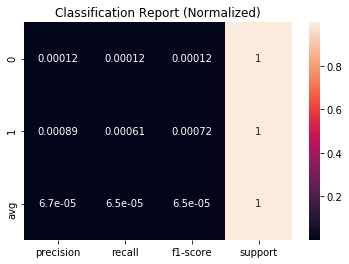

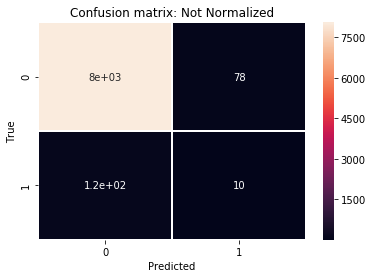

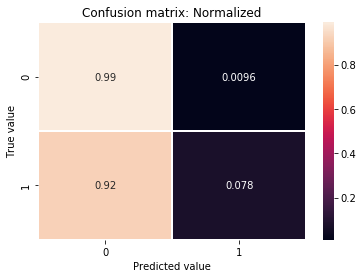

In [29]:
Classifier.classifier("training.csv","test.csv")